# Analizând lucrările despre COVID-19

În această provocare, vom continua cu subiectul pandemiei de COVID și ne vom concentra pe procesarea lucrărilor științifice pe această temă. Există [Setul de date CORD-19](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) cu mai mult de 7000 de lucrări (la momentul redactării) despre COVID, disponibil cu metadate și rezumate (iar pentru aproximativ jumătate dintre ele este oferit și textul complet).

Un exemplu complet de analiză a acestui set de date folosind serviciul cognitiv [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) este descris [în această postare pe blog](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/). Vom discuta o versiune simplificată a acestei analize.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Obținerea Datelor

Mai întâi, trebuie să obținem metadatele pentru lucrările CORD cu care vom lucra.

**NOTĂ**: Nu oferim o copie a setului de date ca parte a acestui depozit. Este posibil să fie nevoie să descărcați mai întâi fișierul [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) din [acest set de date de pe Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge). Este posibil să fie necesară înregistrarea pe Kaggle. De asemenea, puteți descărca setul de date fără înregistrare [de aici](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html), dar acesta va include toate textele complete, pe lângă fișierul de metadate.

Vom încerca să obținem datele direct din sursa online, totuși, dacă acest lucru eșuează, va trebui să descărcați datele așa cum este descris mai sus. De asemenea, are sens să descărcați datele dacă intenționați să experimentați mai mult cu ele, pentru a economisi timp de așteptare.

> **NOTĂ** că setul de date este destul de mare, aproximativ 1 Gb, iar următoarea linie de cod poate dura mult timp pentru a fi finalizată! (~5 minute)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

Vom converti acum coloana cu data publicării la `datetime` și vom crea un histogram pentru a vedea intervalul datelor de publicare.


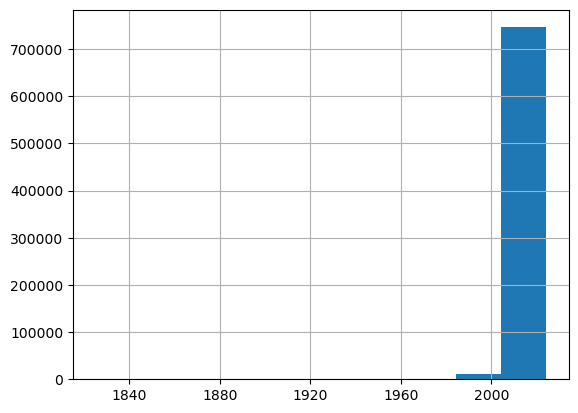

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## Extracția de Date Structurate

Să vedem ce tip de informații putem extrage cu ușurință din rezumate. Un lucru care ne-ar putea interesa este să vedem ce strategii de tratament există și cum au evoluat acestea de-a lungul timpului. Pentru început, putem compila manual lista de medicamente posibile utilizate pentru tratarea COVID, precum și lista de diagnostice. Apoi, le parcurgem și căutăm termenii corespunzători în rezumatele articolelor.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


Am adăugat mai multe coloane în cadrul nostru de date care conțin numărul de apariții ale unui anumit medicament/diagnostic în rezumat.

> **Notă** că adăugăm un spațiu la începutul cuvântului atunci când căutăm un subșir. Dacă nu facem acest lucru, am putea obține rezultate greșite, deoarece *chloroquine* ar fi găsit și în interiorul subșirului *hydroxychloroquine*. De asemenea, forțăm conversia coloanei de rezumate la `str` pentru a evita o eroare - încearcă să elimini `str` și vezi ce se întâmplă.

Pentru a face lucrul cu datele mai ușor, putem extrage sub-cadrul care conține doar numărătorile medicamentelor și să calculăm numărul acumulat de apariții. Acest lucru ne oferă cel mai popular medicament:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

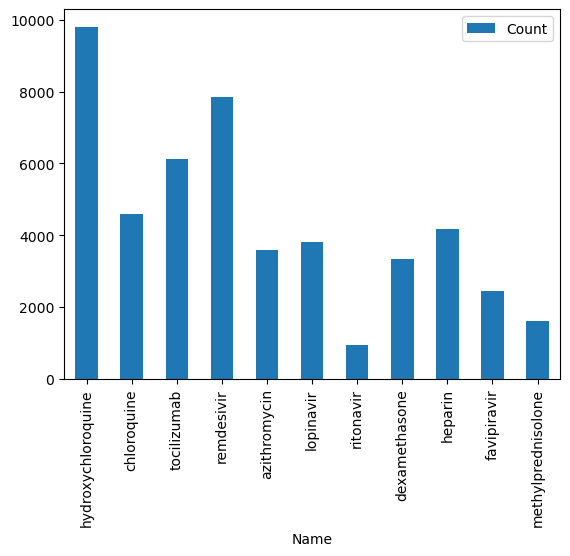

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## Căutarea tendințelor în strategia de tratament

În exemplul de mai sus, am utilizat funcția `sum` pentru a aduna toate valorile, dar putem face același lucru și pe baza lunară:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

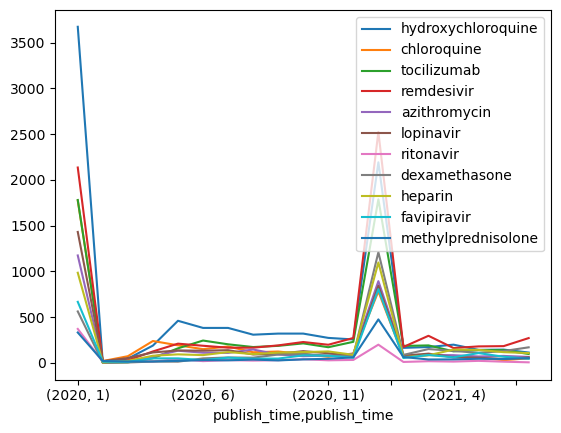

In [152]:
dfmt.plot()
plt.show()

O observație interesantă este că avem creșteri semnificative în două locații: ianuarie 2020 și ianuarie 2021. Acest lucru este cauzat de faptul că unele lucrări nu au o dată de publicare clar specificată și sunt înregistrate ca fiind în ianuarie din anul respectiv.

Pentru a înțelege mai bine datele, să vizualizăm doar câteva medicamente. De asemenea, vom "șterge" datele pentru luna ianuarie și le vom înlocui cu o valoare medie, pentru a obține un grafic mai clar:


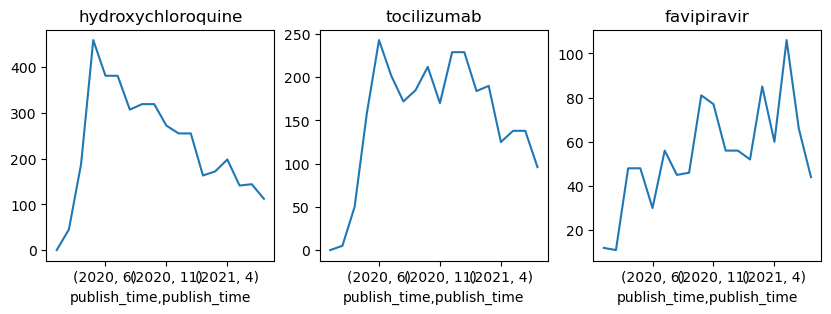

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

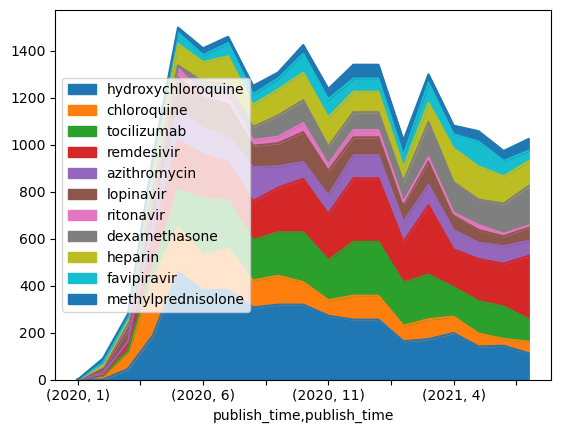

In [154]:
dfmt.plot.area()
plt.show()

Chiar mai departe, putem calcula popularitatea relativă în procente:


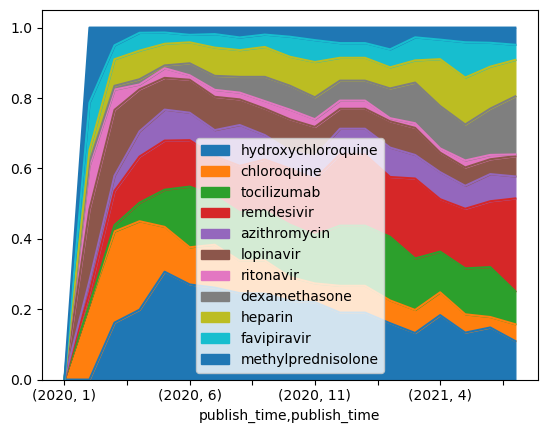

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## Corespondența Medicină-Diagnostic

Una dintre cele mai interesante relații pe care le putem analiza este modul în care diferite diagnostice sunt tratate cu diferite medicamente. Pentru a vizualiza acest lucru, trebuie să calculăm **harta frecvenței de co-apariție**, care arată de câte ori doi termeni sunt menționați în același articol.

O astfel de hartă este, în esență, o matrice 2D, care este cel mai bine reprezentată printr-un **numpy array**. Vom calcula această hartă parcurgând toate rezumatele și marcând entitățile care apar acolo:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

Una dintre modalitățile de a vizualiza această matrice este să desenezi o **hartă termică**:


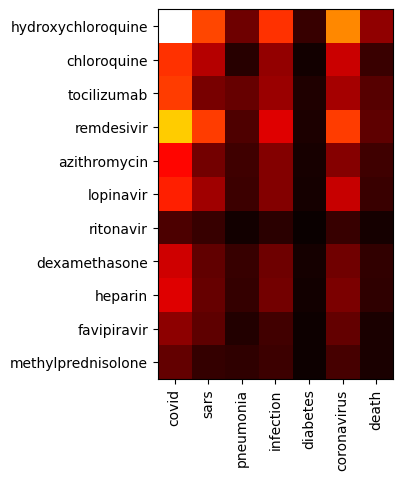

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

Cu toate acestea, o vizualizare și mai bună poate fi realizată folosind așa-numitul **diagramă Sankey**! `matplotlib` nu are suport încorporat pentru acest tip de diagramă, așa că va trebui să folosim [Plotly](https://plotly.com/python/) așa cum este descris [în acest tutorial](https://plotly.com/python/sankey-diagram/).

Pentru a crea o diagramă Sankey cu Plotly, trebuie să construim următoarele liste:
* Lista `all_nodes` cu toate nodurile din grafic, care va include atât medicamentele, cât și diagnosticele
* Lista indicilor sursă și țintă - aceste liste vor arăta care noduri merg spre partea stângă și care spre partea dreaptă a diagramei
* Lista tuturor legăturilor, fiecare legătură constând din:
   - Indexul sursă în array-ul `all_nodes`
   - Indexul țintă
   - O valoare care indică puterea legăturii. Aceasta este exact valoarea din matricea noastră de co-ocurență.
   - Opțional, culoarea legăturii. Vom face o opțiune pentru a evidenția anumiți termeni pentru claritate.

Codul generic pentru a desena o diagramă Sankey este structurat ca o funcție separată `sankey`, care primește două liste (categorii sursă și țintă) și matricea de co-ocurență. De asemenea, ne permite să specificăm un prag și să omitem toate legăturile care sunt mai slabe decât acel prag - acest lucru face ca diagrama să fie puțin mai puțin complexă.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## Concluzie

Ați văzut că putem folosi metode destul de simple pentru a extrage informații din surse de date nestructurate, cum ar fi textul. În acest exemplu, am folosit o listă existentă de medicamente, dar ar fi mult mai puternic să utilizăm tehnici de procesare a limbajului natural (NLP) pentru a realiza extragerea entităților din text. În [această postare pe blog](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) descriem cum să folosim serviciile cloud pentru extragerea entităților. O altă opțiune ar fi utilizarea bibliotecilor NLP din Python, cum ar fi [NLTK](https://www.nltk.org/) - o abordare pentru extragerea informațiilor din text folosind NLTK este descrisă [aici](https://www.nltk.org/book/ch07.html).


## Provocare

Continuă să cercetezi datele din lucrările despre COVID pe următoarele direcții:

1. Construiește o matrice de co-apariție a diferitelor medicamente și analizează care medicamente apar frecvent împreună (adică menționate într-un singur rezumat). Poți modifica codul pentru construirea matricei de co-apariție pentru medicamente și diagnostice.
1. Vizualizează această matrice folosind o hartă termică.
1. Ca obiectiv suplimentar, poți încerca să vizualizezi co-apariția medicamentelor folosind [chord diagram](https://en.wikipedia.org/wiki/Chord_diagram). [Această bibliotecă](https://pypi.org/project/chord/) te poate ajuta să desenezi un chord diagram.
1. Ca un alt obiectiv suplimentar, încearcă să extragi dozele diferitelor medicamente (cum ar fi **400mg** în *administrează 400mg de clorochină zilnic*) folosind expresii regulate și construiește un dataframe care să arate diferite doze pentru diferite medicamente. **Notă**: ia în considerare valorile numerice care se află în apropierea textuală a numelui medicamentului.



---

**Declinarea responsabilității**:  
Acest document a fost tradus folosind serviciul de traducere AI [Co-op Translator](https://github.com/Azure/co-op-translator). Deși depunem eforturi pentru a asigura acuratețea, vă rugăm să rețineți că traducerile automate pot conține erori sau inexactități. Documentul original în limba sa nativă ar trebui considerat sursa autoritară. Pentru informații critice, se recomandă traducerea profesională realizată de un specialist uman. Nu ne asumăm răspunderea pentru eventualele neînțelegeri sau interpretări greșite care pot apărea din utilizarea acestei traduceri.
